In [1]:

# Copyright 2021 MIT 6.S191 Introduction to Deep Learning. All Rights Reserved.
# 
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of 6.S191 must
# reference:
#
# © MIT 6.S191: Introduction to Deep Learning
# http://introtodeeplearning.com
#

# Mnist Digit Classification

In [9]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print('gpu', gpu)
    tf.config.experimental.set_memory_growth(gpu, True)
    print('memory growth:' , tf.config.experimental.get_memory_growth(gpu))
    
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

gpu PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
memory growth: True


### MNIST dataset 

In [11]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 2s 0us/step


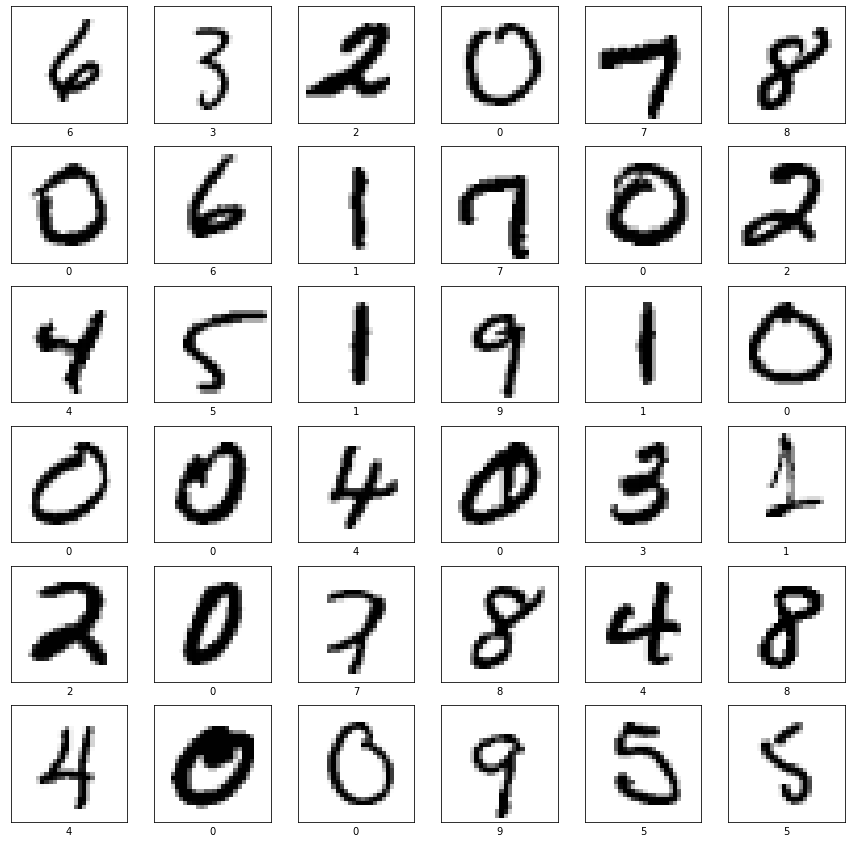

In [17]:
plt.figure(figsize=(15,15))
random_inds = np.random.choice(60000, 36)
for i in range(36):
    plt.subplot(6,6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

### Build the model

In [20]:
def build_fc_model():
    fc_model = tf.keras.Sequential([
        #1 layer - flatten
        tf.keras.layers.Flatten(),
        
        #2 layer - Dense
        tf.keras.layers.Dense(128, activation='relu'),
        
        #3 layer - Dense
        tf.keras.layers.Dense(1, activation='softmax')
    ])
    
    return fc_model

model = build_fc_model()

#### Compile the model

In [24]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#### Fit the model

In [28]:
BATCH_SIZE = 64
EPOCHS = 5

history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 1s 727us/step - loss: nan - accuracy: 0.0987
Epoch 2/5
938/938 [==============================] - 1s 729us/step - loss: nan - accuracy: 0.0987
Epoch 3/5
938/938 [==============================] - 1s 747us/step - loss: nan - accuracy: 0.0987
Epoch 4/5
938/938 [==============================] - 1s 903us/step - loss: nan - accuracy: 0.0987
Epoch 5/5
938/938 [==============================] - 1s 822us/step - loss: nan - accuracy: 0.0987


#### Evaluate the model

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

157/157 [==============================] - 0s 654us/step - loss: nan - accuracy: 0.0980
Test loss:  nan
Test accuracy:  0.09799999743700027


#### Predict values

In [27]:
predictions = model.predict(test_images[:3])
print(predictions)
print(predictions.shape)

[[nan]
 [nan]
 [nan]]
(3, 1)


### Convolutional Neural Network (CNN) for handwritten digit classification